In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
# Features and target
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

X.shape, y.shape

((3000, 2), (3000,))

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20
    , random_state=27
)


In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Base model
knn = KNeighborsClassifier()

In [7]:
# Set up parameter grid
param_grid = {'n_neighbors': np.arange(1, 21)}

# GridSearchCV
grid = GridSearchCV(
    estimator=knn
    , param_grid=param_grid
    , cv=5, scoring='accuracy'
   # , return_train_score=True
)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [8]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=15)

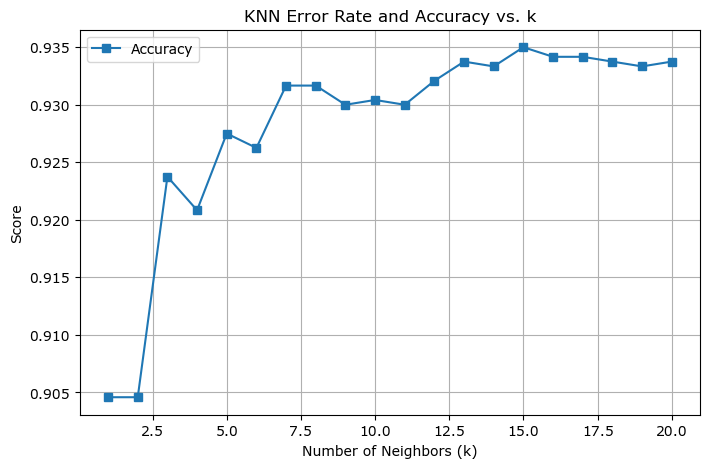

In [9]:
# Get mean test scores for each n_neighbors

test_scores = grid.cv_results_['mean_test_score']
neighbors = param_grid['n_neighbors']

plt.figure(figsize=(8,5))

plt.plot(
    neighbors
    , test_scores
    , marker='s'
    , label='Accuracy'
)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Error Rate and Accuracy vs. k')
plt.legend()
plt.grid(True)
plt.show()

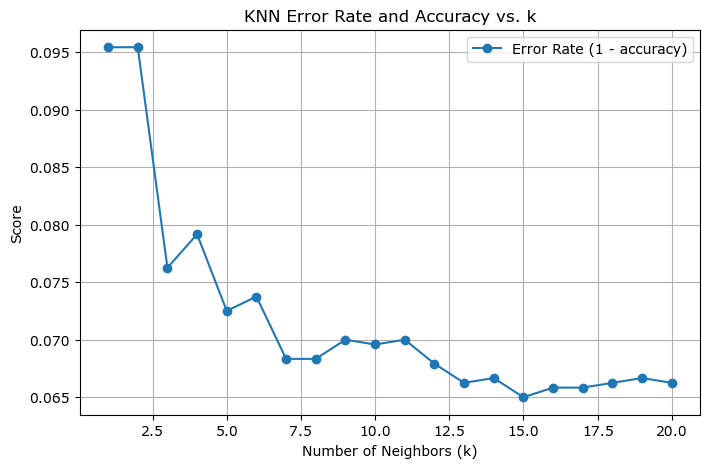

In [10]:
plt.figure(figsize=(8,5))

plt.plot(
    neighbors
    , 1 - test_scores
    , marker='o'
    , label='Error Rate (1 - accuracy)'
)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Error Rate and Accuracy vs. k')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Best n_neighbors
best_k = grid.best_params_['n_neighbors']
print(f'Best n_neighbors: {best_k}')
print(f'Best cross-validated accuracy: {grid.best_score_:.3f}')

# Retrain on entire train set
best_knn = KNeighborsClassifier(
    n_neighbors=best_k)

best_knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_knn.predict(X_test_scaled)

# Evaluation
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

Best n_neighbors: 15
Best cross-validated accuracy: 0.935
Test Set Accuracy: 0.9383333333333334


In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[273,  15],
       [ 22, 290]])

<Axes: >

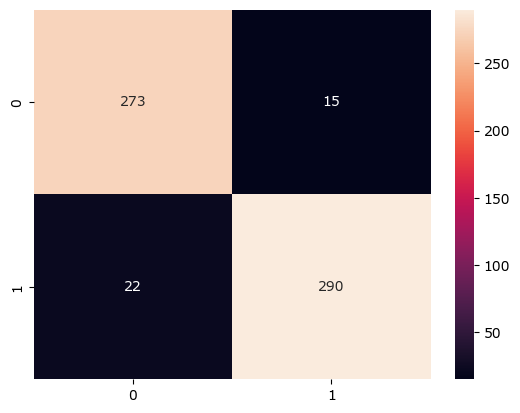

In [26]:
sns.heatmap(
    confusion_matrix(y_test, y_pred)
    cm
    , annot=True
    , fmt="d")

In [15]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.95      0.94       288
           1       0.95      0.93      0.94       312

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

